# Titanic Survival Predicition

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

## EDA

In [4]:
train_df = pd.read_csv('../Titanic_Survival_Prediction/data/train.csv')
test_df = pd.read_csv('../Titanic_Survival_Prediction/data/test.csv')

In [5]:
print(train_df.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [6]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Imbalanced label Class 

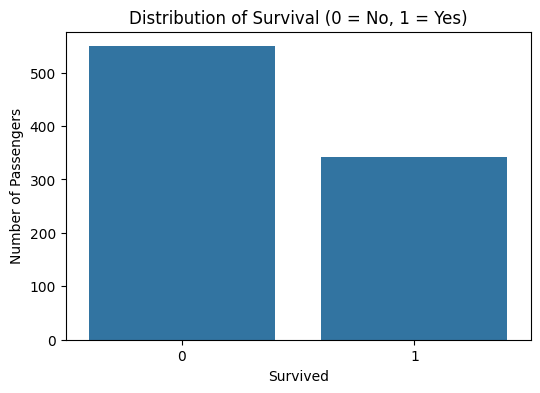

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survival (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()

## Analyze Numerical Features vs. Survived

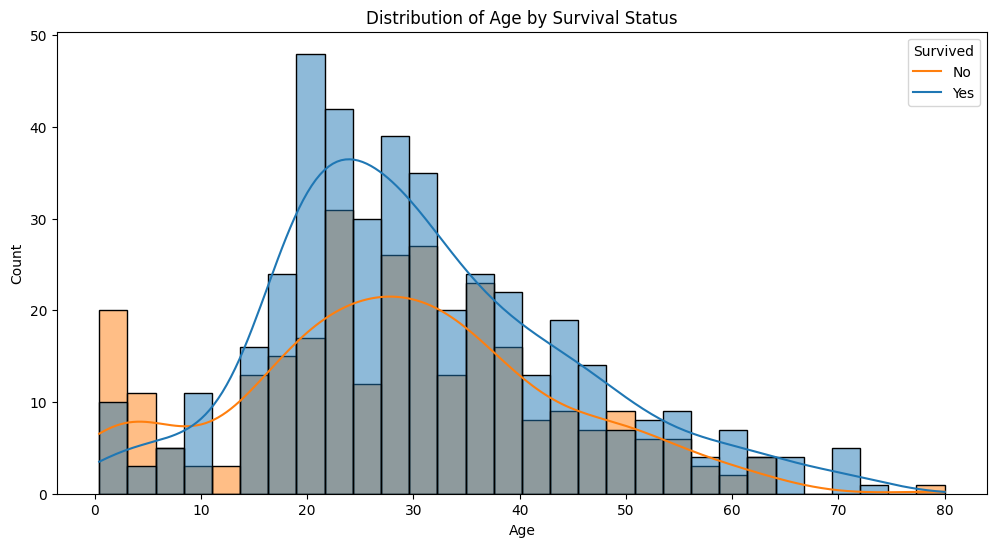


--- Age Statistics by Survival ---
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Survived
0    28.0
1    28.0
Name: Age, dtype: float64


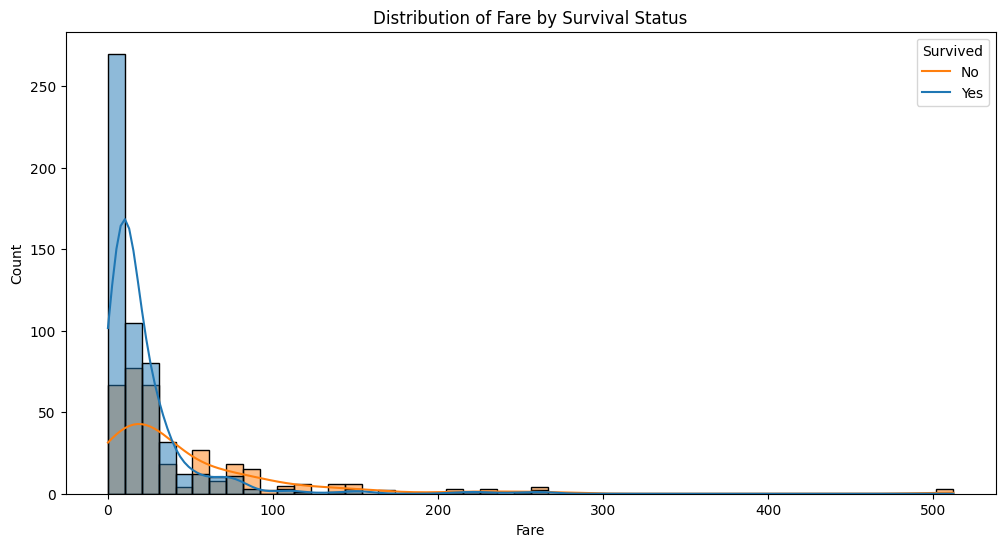


--- Fare Statistics by Survival ---
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


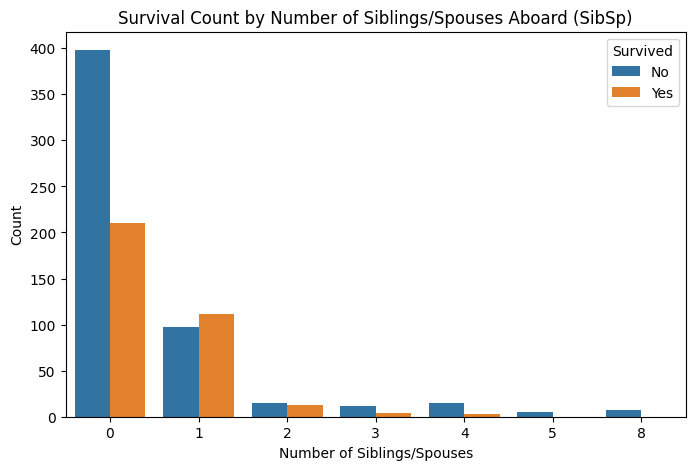


--- SibSp Survival Rates ---
SibSp
1    0.535885
2    0.464286
0    0.345395
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


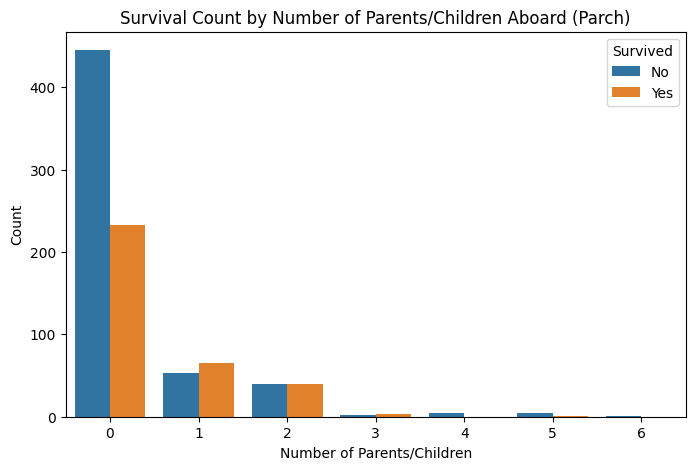


--- Parch Survival Rates ---
Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
4    0.000000
6    0.000000
Name: Survived, dtype: float64


In [11]:
# --- Task 2.2.1: Age vs. Survived ---
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribution of Age by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- Age Statistics by Survival ---")
print(train_df.groupby('Survived')['Age'].mean())
print(train_df.groupby('Survived')['Age'].median())

# --- Task 2.2.2: Fare vs. Survived ---
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True, bins=50)
plt.title('Distribution of Fare by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- Fare Statistics by Survival ---")
print(train_df.groupby('Survived')['Fare'].mean())
print(train_df.groupby('Survived')['Fare'].median())


# --- Task 2.2.3: SibSp vs. Survived ---
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='SibSp', hue='Survived')
plt.title('Survival Count by Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- SibSp Survival Rates ---")
print(train_df.groupby('SibSp')['Survived'].mean().sort_values(ascending=False))


# --- Task 2.2.4: Parch vs. Survived ---
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Parch', hue='Survived')
plt.title('Survival Count by Number of Parents/Children Aboard (Parch)')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- Parch Survival Rates ---")
print(train_df.groupby('Parch')['Survived'].mean().sort_values(ascending=False))

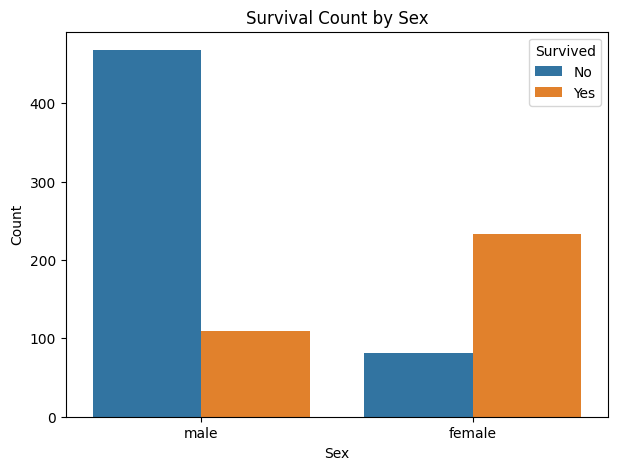


--- Survival Rate by Sex ---
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


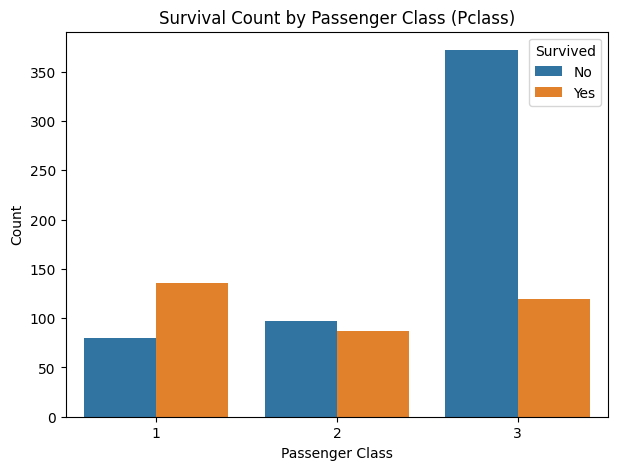


--- Survival Rate by Pclass ---
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


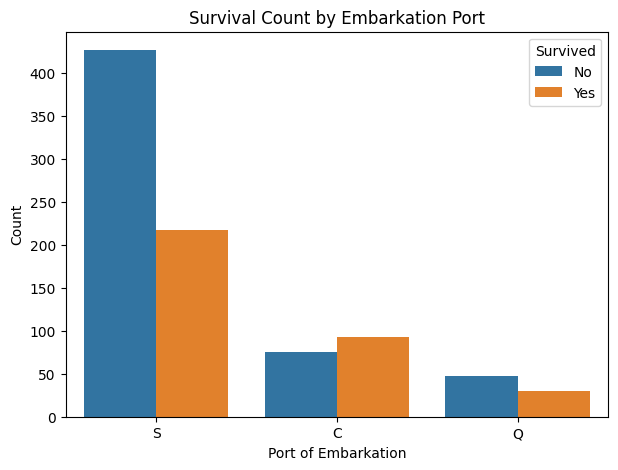


--- Survival Rate by Embarked Port ---
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [12]:
# --- Task 2.3.1: Sex vs. Survived ---
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- Survival Rate by Sex ---")
print(train_df.groupby('Sex')['Survived'].mean().sort_values(ascending=False))


# --- Task 2.3.2: Pclass vs. Survived ---
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- Survival Rate by Pclass ---")
print(train_df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False))


# --- Task 2.3.3: Embarked vs. Survived ---
plt.figure(figsize=(7, 5))
sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

print("\n--- Survival Rate by Embarked Port ---")
print(train_df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False))


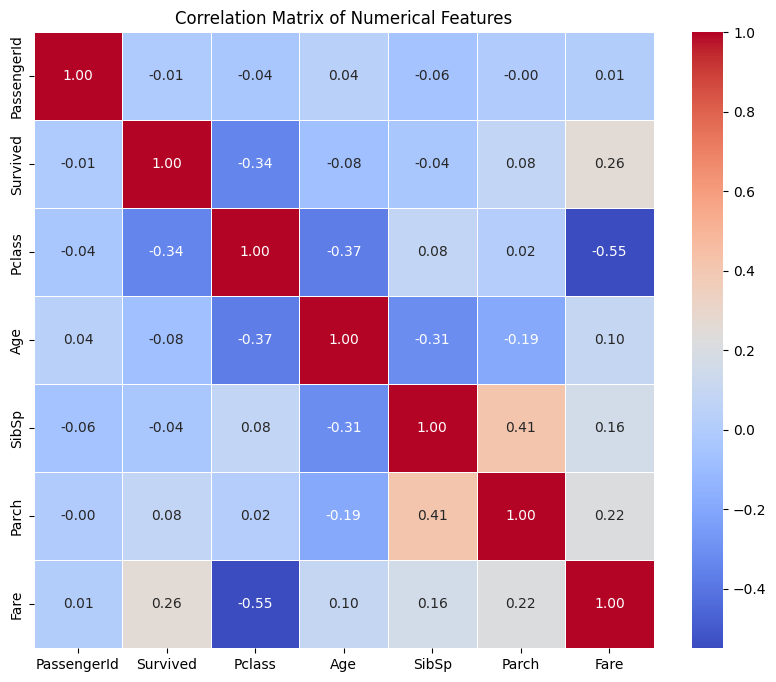


--- Correlation Matrix (Raw Data) ---
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [13]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n--- Correlation Matrix (Raw Data) ---")
print(correlation_matrix)

Here's a summary of the key insights we've gathered:

- **Target Imbalance:**  
  - The dataset is imbalanced, with more non-survivors than survivors.  
  - We'll need to consider evaluation metrics beyond simple accuracy.

- **Sex is Critical:**  
  - Females had a significantly higher survival rate than males ("women and children first").

- **Age Matters:**  
  - Infants (0-5) had a high survival rate.  
  - Young adults (20-30s) also showed good survival.  
  - Older passengers (40-50+) had much lower chances.

- **Fare & Pclass are Strong Predictors:**  
  - Higher fares and lower Pclass numbers (i.e., 1st class) strongly correlated with higher survival chances.  
  - These two features are also negatively correlated with each other (higher class = higher fare).

- **Family Size (SibSp, Parch):**  
  - Being completely alone or part of a very large family generally decreased survival chances.  
  - Small families might have had a slight advantage.  
  - This suggests a potential for a FamilySize feature.

- **Embarked Port:**  
  - Passengers from Cherbourg (C) had a higher survival rate, likely due to a higher proportion of first-class passengers.

## Data Preprocessing and Feature Engineering

## Handle missing values for (Embarked) Column

In [14]:
print(train_df[train_df['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [15]:
train_df.loc[train_df['Embarked'].isnull(), 'Embarked'] = 'C'

In [16]:
train_df = train_df.drop(columns=['Cabin', 'Ticket', 'Name'], axis=1)
test_df = test_df.drop(columns=['Cabin', 'Ticket', 'Name'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


### Impute (Age) & (Fare) Columns

In [17]:
age_mean = train_df['Age'].mean()
train_df['Age'].fillna(age_mean, inplace=True)
test_df['Age'].fillna(age_mean, inplace=True)
fare_mean = train_df['Fare'].mean()
train_df['Fare'].fillna(fare_mean, inplace=True)
test_df['Fare'].fillna(fare_mean, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


C:\Users\moham\AppData\Local\Temp\ipykernel_22472\2543169286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(age_mean, inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_22472\2543169286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [19]:
train_df['family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['family_size'] = test_df['SibSp'] + test_df['Parch'] + 1

In [20]:
train_df['is_alone'] = np.where(train_df['family_size'] == 1, 1, 0)
test_df['is_alone'] = np.where(test_df['family_size'] == 1, 1, 0)

In [21]:
train_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_df.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,is_alone
0,1,0,3,male,22.0,7.2500,S,2,0
1,2,1,1,female,38.0,71.2833,C,2,0
2,3,1,3,female,26.0,7.9250,S,1,1
3,4,1,1,female,35.0,53.1000,S,2,0
4,5,0,3,male,35.0,8.0500,S,1,1


### Label Encoding

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   family_size  418 non-null    int64  
 7   is_alone     418 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [24]:
test_passenger_ids = test_df['PassengerId']


features_to_drop = ['PassengerId'] 

# Make a copy to avoid SettingWithCopyWarning if you've done in-place modifications
train_data = train_df.copy()
test_data = test_df.copy()

# Separate target variable (Survived) from training features
y_train = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)

# Drop PassengerId from training features now
X_train = X_train.drop('PassengerId', axis=1)


categorical_features = ['Sex', 'Embarked']

combined_features = pd.concat([X_train, test_data.drop('PassengerId', axis=1)], ignore_index=True)

print("Shape of combined features BEFORE encoding:", combined_features.shape)
print("Dtypes of combined features BEFORE encoding:\n", combined_features.dtypes)


# Apply One-Hot Encoding
# drop_first=True prevents multicollinearity by dropping one category per feature
combined_features_encoded = pd.get_dummies(combined_features, columns=categorical_features, drop_first=True)

print("\nShape of combined features AFTER encoding:", combined_features_encoded.shape)
print("Dtypes of combined features AFTER encoding:\n", combined_features_encoded.dtypes)


# Split back into training and testing sets
X_train_processed = combined_features_encoded.iloc[:len(X_train)]
X_test_processed = combined_features_encoded.iloc[len(X_train):]

# Verify the shapes
print(f"\nShape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

# Display first few rows and info of processed training data
print("\n--- X_train_processed Head ---")
print(X_train_processed.head())
print("\n--- X_train_processed Info ---")
X_train_processed.info()

# Display first few rows and info of processed test data
print("\n--- X_test_processed Head ---")
print(X_test_processed.head())
print("\n--- X_test_processed Info ---")
X_test_processed.info()

Shape of combined features BEFORE encoding: (1309, 7)
Dtypes of combined features BEFORE encoding:
 Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
family_size      int64
is_alone         int64
dtype: object

Shape of combined features AFTER encoding: (1309, 8)
Dtypes of combined features AFTER encoding:
 Pclass           int64
Age            float64
Fare           float64
family_size      int64
is_alone         int64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object

Shape of X_train_processed: (891, 8)
Shape of y_train: (891,)
Shape of X_test_processed: (418, 8)

--- X_train_processed Head ---
   Pclass   Age     Fare  family_size  is_alone  Sex_male  Embarked_Q  \
0       3  22.0   7.2500            2         0      True       False   
1       1  38.0  71.2833            2         0     False       False   
2       3  26.0   7.9250            1         1     False       False   
3    

## Model Selection and Training

In [25]:
X = X_train_processed # Our processed features from the training set
y = y_train           # Our target variable

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original X_train_processed shape: {X.shape}")
print(f"X_train_split shape: {X_train_split.shape}")
print(f"X_val_split shape: {X_val_split.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"y_val_split shape: {y_val_split.shape}")

# Verify stratification (optional, but good practice)
print("\n--- Survival distribution in splits ---")
print("Original y_train:\n", y.value_counts(normalize=True))
print("y_train_split:\n", y_train_split.value_counts(normalize=True))
print("y_val_split:\n", y_val_split.value_counts(normalize=True))

# --- Task 5.2: Select and Train Initial Models ---
print("\n--- Training Models ---")

# 1. Logistic Regression
print("Training Logistic Regression...")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets
log_reg_model.fit(X_train_split, y_train_split)
print("Logistic Regression Model Trained.")

# 2. Decision Tree Classifier
print("Training Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_split, y_train_split)
print("Decision Tree Model Trained.")

# 3. Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_split, y_train_split)
print("Random Forest Model Trained.")

Original X_train_processed shape: (891, 8)
X_train_split shape: (712, 8)
X_val_split shape: (179, 8)
y_train_split shape: (712,)
y_val_split shape: (179,)

--- Survival distribution in splits ---
Original y_train:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
y_train_split:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
y_val_split:
 Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64

--- Training Models ---
Training Logistic Regression...
Logistic Regression Model Trained.
Training Decision Tree Classifier...
Decision Tree Model Trained.
Training Random Forest Classifier...
Random Forest Model Trained.


## Model Evaluation


Evaluating Logistic Regression...
  Accuracy: 0.8101
  Precision: 0.7869
  Recall: 0.6957
  F1-Score: 0.7385
  ROC AUC: 0.8353
  Confusion Matrix:
[[97 13]
 [21 48]]


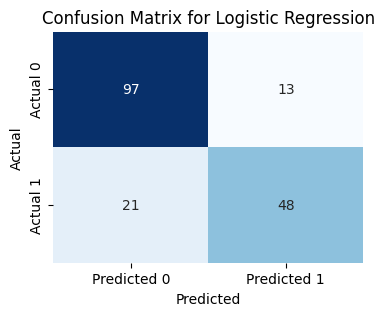


Evaluating Decision Tree...
  Accuracy: 0.7765
  Precision: 0.7164
  Recall: 0.6957
  F1-Score: 0.7059
  ROC AUC: 0.7457
  Confusion Matrix:
[[91 19]
 [21 48]]


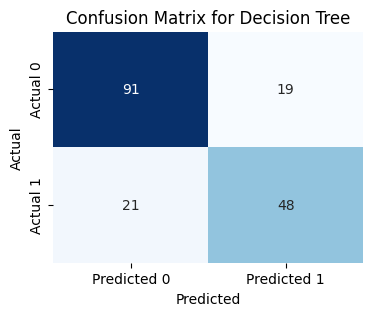


Evaluating Random Forest...
  Accuracy: 0.8156
  Precision: 0.7903
  Recall: 0.7101
  F1-Score: 0.7481
  ROC AUC: 0.8331
  Confusion Matrix:
[[97 13]
 [20 49]]


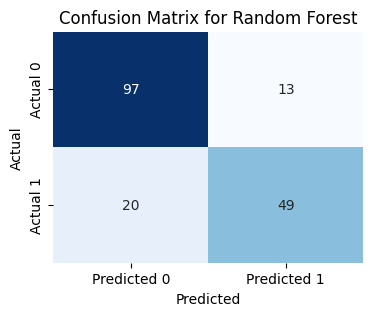


--- Summary of Model Performance ---

Logistic Regression:
  Accuracy: 0.8101
  Precision: 0.7869
  Recall: 0.6957
  F1-Score: 0.7385
  ROC AUC: 0.8353

Decision Tree:
  Accuracy: 0.7765
  Precision: 0.7164
  Recall: 0.6957
  F1-Score: 0.7059
  ROC AUC: 0.7457

Random Forest:
  Accuracy: 0.8156
  Precision: 0.7903
  Recall: 0.7101
  F1-Score: 0.7481
  ROC AUC: 0.8331

--- Tabular Comparison ---
                     Accuracy  Precision  Recall  F1-Score  ROC AUC
Model                                                              
Logistic Regression    0.8101     0.7869  0.6957    0.7385   0.8353
Decision Tree          0.7765     0.7164  0.6957    0.7059   0.7457
Random Forest          0.8156     0.7903  0.7101    0.7481   0.8331


In [26]:
models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

results = {}

for name, model in models.items():
    print(f"\nEvaluating {name}...")

    # Make predictions
    y_pred = model.predict(X_val_split)

    # Get probabilities for ROC AUC (for binary classification, typically[:, 1] for positive class)
    y_proba = model.predict_proba(X_val_split)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_val_split, y_pred)
    precision = precision_score(y_val_split, y_pred)
    recall = recall_score(y_val_split, y_pred)
    f1 = f1_score(y_val_split, y_pred)
    roc_auc = roc_auc_score(y_val_split, y_proba)
    cm = confusion_matrix(y_val_split, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    }

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Confusion Matrix:\n{cm}")

    # Optional: Visualize Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# --- Task 6.3: Compare Results ---
print("\n--- Summary of Model Performance ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.4f}")

# You can also create a DataFrame for easier comparison
performance_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [m['Accuracy'] for m in results.values()],
    'Precision': [m['Precision'] for m in results.values()],
    'Recall': [m['Recall'] for m in results.values()],
    'F1-Score': [m['F1-Score'] for m in results.values()],
    'ROC AUC': [m['ROC AUC'] for m in results.values()]
}).set_index('Model')

print("\n--- Tabular Comparison ---")
print(performance_df.round(4))

- **Conclusion for this stage:**
  -   The Random Forest Classifier is marginally the best performing model based on Accuracy and F1-Score on this validation set.
  -   Logistic Regression is a very strong runner-up, demonstrating excellent performance for a simpler, linear model. Its slightly higher ROC AUC is notable.
  -   The Decision Tree by itself is clearly underperforming compared to the other two, likely due to overfitting to the training data or simply not capturing the complex relationships as well as the ensemble method (Random Forest) or the well-tuned Logistic Regression.

## Hyperparameter Tuning & Final Model

### Hyperparameter Tuning for Random Forest

In [27]:
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up StratifiedKFold for cross-validation
# n_splits=5 means 5-fold CV
# shuffle=True shuffles the data before splitting into batches (important)
# random_state for reproducibility
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=cv_stratified,
    scoring='f1', # Optimize for F1-score due to imbalance
    n_jobs=-1,    # Use all available CPU cores
    verbose=1     # Show progress
)

# Fit GridSearchCV to the FULL processed training data (X_train_processed, y_train)
# GridSearchCV will handle the internal train/validation splits based on cv_stratified
grid_search_rf.fit(X_train_processed, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
best_estimator_rf = grid_search_rf.best_estimator_ # The best trained model

print(f"\nBest parameters for Random Forest: {best_params_rf}")
print(f"Best F1-Score for Random Forest (CV): {best_score_rf:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-Score for Random Forest (CV): 0.7737


### Hyperparameter Tuning for Logistic Regression

In [28]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'saga']      # Algorithm to use in the optimization problem
}

# Initialize LogisticRegression
lr = LogisticRegression(random_state=42)

# Use the same StratifiedKFold for consistency
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=cv_stratified,
    scoring='f1', # Optimize for F1-score
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the FULL processed training data
grid_search_lr.fit(X_train_processed, y_train)

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_
best_estimator_lr = grid_search_lr.best_estimator_ # The best trained LR model

print(f"\nBest parameters for Logistic Regression: {best_params_lr}")
print(f"Best F1-Score for Logistic Regression (CV): {best_score_lr:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best F1-Score for Logistic Regression (CV): 0.7367


## Predicition

In [30]:
# Task 8.1: Make Predictions on the Test Data
print("Making predictions on the test data using the best Random Forest model...")
final_predictions = best_estimator_rf.predict(X_test_processed)
print("Predictions made.")

# Task 8.2: Prepare Submission File
print("Preparing submission file...")

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': test_passenger_ids, # Use the PassengerIds saved earlier
    'Survived': final_predictions
})

# Display the first few rows of the submission file
print("\n--- Sample Submission File ---")
print(submission_df.head())

# Save the submission file
submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"\nSubmission file saved successfully to: {submission_file_path}")
print("You can now upload this 'submission.csv' file to Kaggle!")

Making predictions on the test data using the best Random Forest model...
Predictions made.
Preparing submission file...

--- Sample Submission File ---
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

Submission file saved successfully to: submission.csv
You can now upload this 'submission.csv' file to Kaggle!
